In [1]:
import zipfile
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img


In [2]:
import zipfile
import os

# Specify the path to the uploaded zip file
zip_file_path = r"C:\Users\ranga\Downloads\gram_data.zip"

# Specify the directory where you want to extract the contents
extraction_path = r"C:\Users\ranga\Downloads\gpncc"

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

# List the files in the extraction directory
extracted_files = os.listdir(extraction_path)
print(extracted_files)


['gram_data']


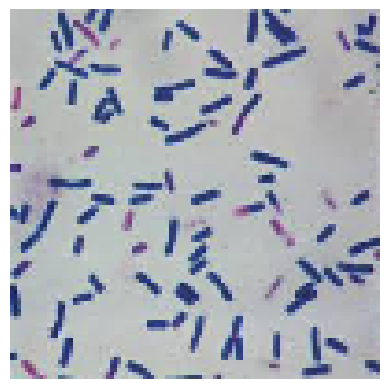

(100, 100, 3)


In [3]:
import cv2
import matplotlib.pyplot as plt

# Load and display an example image
train_path = r"C:\Users\ranga\Downloads\gpncc\gram_data\train"
test_path = r"C:\Users\ranga\Downloads\gpncc\gram_data\test"
#Displaying the image
img = load_img(train_path + "/gp/1.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()
#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)


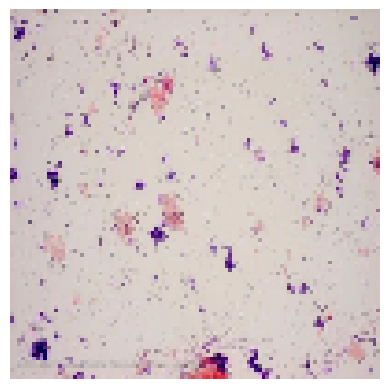

In [4]:
train_path = os.path.join(extraction_path, "gram_data/train")

# Displaying an image
img = load_img(os.path.join(train_path, "gp/7.jpg"), target_size=(100, 100))
plt.imshow(img)
plt.axis("off")
plt.show()


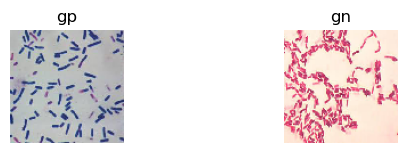

In [5]:
images = ['gp', 'gn']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + '/'+ images[i] +"/1.jpg", target_size=(100,100)))

In [6]:
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

2


In [1]:
# Define Siamese network architecture
def siamese_network(input_shape):
    input_image = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu')(input_image)
    x = MaxPooling2D()(x)
    x = Conv2D(64, (3, 3), activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)

    return Model(input_image, x)

# Contrastive loss for Siamese network
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * 0.5 * K.square(y_pred) + (1 - y_true) * 0.5 * K.square(K.maximum(margin - y_pred, 0)))

In [ ]:
# Create Siamese network
input_shape = (100, 100, 3)

# Define two input layers for the two images
input_image_1 = Input(shape=input_shape)
input_image_2 = Input(shape=input_shape)

# Create Siamese subnetwork and apply it to both inputs
siamese_model = siamese_network(input_shape)
output_1 = siamese_model(input_image_1)
output_2 = siamese_model(input_image_2)

# Calculate L1 distance between the output embeddings
distance = Lambda(lambda tensors: K.abs(tensors[0] - tensors[1]))([output_1, output_2])

# Output 1 if the images are similar (same class), 0 if dissimilar
output = Dense(1, activation='sigmoid')(distance)

siamese_network = Model(inputs=[input_image_1, input_image_2], outputs=output)

# Compile the Siamese network
siamese_network.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001)

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

# Model architecture
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape)) #Filter size=32, filter_shape = 3x3
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3))) #number of filters= 64
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))  # 2 classes for binary classification (gp and gn)
model.add(Activation("softmax"))


In [8]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [9]:
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
# Generating batches of augmented training data
train_generator = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 40 images belonging to 2 classes.


In [11]:
# Generating batches of testing data
test_generator = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(100, 100),
    batch_size=batch_size,
    class_mode="categorical"
)


Found 29 images belonging to 2 classes.


In [12]:
epochs = 100

history = model.fit(
    train_generator,
    epochs=epochs,
    steps_per_epoch=len(train_generator)
)


Epoch 1/100
3/3 [==============================] - 3s 257ms/step - loss: 0.7474 - accuracy: 0.4750
Epoch 2/100
3/3 [==============================] - 1s 181ms/step - loss: 0.8294 - accuracy: 0.3500
Epoch 3/100
3/3 [==============================] - 1s 163ms/step - loss: 0.6928 - accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 1s 232ms/step - loss: 0.7048 - accuracy: 0.4250
Epoch 5/100
3/3 [==============================] - 1s 145ms/step - loss: 0.6684 - accuracy: 0.7250
Epoch 6/100
3/3 [==============================] - 1s 147ms/step - loss: 0.6534 - accuracy: 0.5250
Epoch 7/100
3/3 [==============================] - 1s 151ms/step - loss: 0.6282 - accuracy: 0.5500
Epoch 8/100
3/3 [==============================] - 1s 234ms/step - loss: 0.6492 - accuracy: 0.6250
Epoch 9/100
3/3 [==============================] - 1s 194ms/step - loss: 0.5290 - accuracy: 0.7250
Epoch 10/100
3/3 [==============================] - 1s 224ms/step - loss: 0.5737 - accuracy: 0.7000
Epoch 11/

In [13]:
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input
import numpy as np

# Load and preprocess the test image
test_image = load_img(r"C:\Users\ranga\Downloads\gpncc\gram_data\test\gp\21.jpg", target_size=(100, 100))
test_image = img_to_array(test_image)
test_image = preprocess_input(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Make predictions using the trained model
predictions = model.predict(test_image)

# Assuming you have class labels, you can map the predictions to class labels
class_labels = ["gn", "gp"]  # Replace with your actual class labels

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 154ms/step
Predicted class: gp
